In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
complaints = pd.read_csv("./Data/complaints.csv")

In [3]:
complaints

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [4]:
complaints['Issue'].value_counts()

Incorrect information on your report    229305
Attempts to collect debt not owed        73163
Communication tactics                    21243
Struggling to pay mortgage               17374
Fraud or scam                            12347
Name: Issue, dtype: int64

In [5]:
### Convert column name so that they don't have space and are more readable
complaints = complaints.rename(columns = {'Consumer complaint narrative' : 'complaint_narrative', 'Issue' : 'complaint_issue'})



<Axes: ylabel='Frequency'>

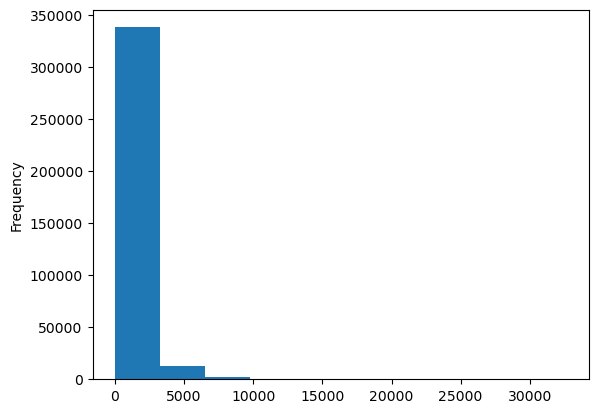

In [6]:
complaints['complaint_narrative'].apply(len).plot(kind = 'hist')

In [7]:
### Keep the length columns as a new column
complaints['complaint_length'] = complaints['complaint_narrative'].apply(len)
complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace(r'[xX][xX]+',"")

/var/folders/s3/9_r9v9px7_v0q69b5zcbnmsm0000gn/T/ipykernel_47662/412939920.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace(r'[xX][xX]+',"")


In [8]:
complaints

,complaint_narrative,complaint_issue,complaint_length
0,My name is this complaint is not made in err...,Incorrect information on your report,711
1,I searched on for and was pointed to a web...,Fraud or scam,1958
2,I have a particular account that is stating th...,Incorrect information on your report,294
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed,3444
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report,876
...,...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed,42
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed,4586
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed,4328
353430,"My Father, a acquired an HECM reverse mortg...",Struggling to pay mortgage,5418


In [9]:
# list of potentially unique redaction patterns.  
redaction_patterns = complaints['complaint_narrative'].str.extractall(r'(X+)').reset_index()[0].unique()

# display the results
print(redaction_patterns)

['X']


In [11]:
redaction_counts = complaints.groupby('complaint_issue')['complaint_narrative'].apply(lambda x: x.str.extractall(r'(\w+X+\w+)').groupby(0).size().reset_index(name='count'))
redaction_counts

0  count
complaint_issue                                              
Attempts to collect debt not owed 0                3Xs      1
                                  1    AMERICANEXPRESS      2
                                  2            ANXIETY      1
                                  3      APPROXIMATELY      3
                                  4             AXCESS      1
...                                                ...    ...
Struggling to pay mortgage        132            TOXIC      5
                                  133            TXHAF     11
                                  134      UNEXCUSABLE      1
                                  135      UNEXPLAINED      1
                                  136          eXPlain      1

[737 rows x 2 columns]

In [12]:
complaints['complaint_length'].max()

32616

In [13]:
complaints['complaint_length'].min()

4

In [ ]:
# tomo code
complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace(r'[xX][xX]+','', regex=True)